<a href="https://colab.research.google.com/github/DavBelM/Multimodal_Data_Preprocessing/blob/main/Formative2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [118]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Display Settings

In [119]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Datasets

In [120]:
social = pd.read_csv('/content/customer_social_profiles - customer_social_profiles.csv')
transactions = pd.read_csv('/content/customer_transactions - customer_transactions.csv')

## Exploratory Data Analysis

## Social Profiles Dataset

In [121]:
social.head()

customer_id_new social_media_platform  engagement_score  \
0            A178              LinkedIn                74   
1            A190               Twitter                82   
2            A150              Facebook                96   
3            A162               Twitter                89   
4            A197               Twitter                92   

   purchase_interest_score review_sentiment  
0                      4.9         Positive  
1                      4.8          Neutral  
2                      1.6         Positive  
3                      2.6         Positive  
4                      2.3          Neutral

In [122]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          155 non-null    object 
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.2+ KB


In [123]:
social.describe()

engagement_score  purchase_interest_score
count        155.000000               155.000000
mean          75.606452                 3.152903
std           14.568021                 1.142867
min           50.000000                 1.000000
25%           63.500000                 2.350000
50%           77.000000                 3.200000
75%           87.500000                 4.100000
max           99.000000                 5.000000

In [124]:
missing_social = social.isnull().sum()
missing_social_pct = (missing_social / len(social)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_social,
    'Percentage': missing_social_pct
})
display(missing_info[missing_info['Missing Count'] > 0])

Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

In [125]:
# Checking for duplicates
print(f"\n Duplicate Rows: {social.duplicated().sum()}")


 Duplicate Rows: 5


## Transactions Dataset

In [126]:
transactions.head()


customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001              408    2024-01-01   
1                 192            1002              332    2024-01-02   
2                 114            1003              442    2024-01-03   
3                 171            1004              256    2024-01-04   
4                 160            1005               64    2024-01-05   

  product_category  customer_rating  
0           Sports              2.3  
1      Electronics              4.2  
2      Electronics              2.1  
3         Clothing              2.8  
4         Clothing              1.3

In [127]:
transactions[transactions['customer_id_legacy'] == 150]

customer_id_legacy  transaction_id  purchase_amount purchase_date  \
41                 150            1042              389    2024-02-11   
45                 150            1046              177    2024-02-15   

   product_category  customer_rating  
41           Sports              NaN  
45            Books              3.6

In [128]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id_legacy  150 non-null    int64  
 1   transaction_id      150 non-null    int64  
 2   purchase_amount     150 non-null    int64  
 3   purchase_date       150 non-null    object 
 4   product_category    150 non-null    object 
 5   customer_rating     140 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.2+ KB


In [129]:
transactions.describe()

customer_id_legacy  transaction_id  purchase_amount  customer_rating
count          150.000000      150.000000       150.000000        140.00000
mean           148.760000     1075.500000       280.780000          2.98500
std             30.046425       43.445368       121.329595          1.20699
min            100.000000     1001.000000        51.000000          1.00000
25%            121.250000     1038.250000       179.000000          1.95000
50%            150.500000     1075.500000       274.000000          3.00000
75%            174.750000     1112.750000       388.500000          4.00000
max            199.000000     1150.000000       495.000000          5.00000

In [130]:
missing_trans = transactions.isnull().sum()
missing_trans_pct = (missing_trans / len(transactions)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_trans,
    'Percentage': missing_trans_pct
})
display(missing_info[missing_info['Missing Count'] > 0])

Missing Count  Percentage
customer_rating             10    6.666667

In [131]:
print(f"\n Duplicate Rows: {transactions.duplicated().sum()}")


 Duplicate Rows: 0


## Visualization

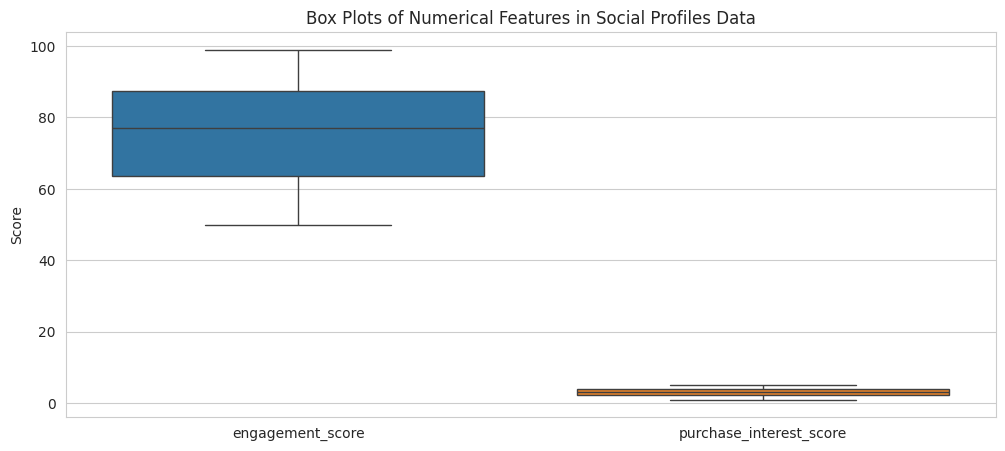

In [132]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=social[['engagement_score', 'purchase_interest_score']])
plt.title('Box Plots of Numerical Features in Social Profiles Data')
plt.ylabel('Score')
plt.show()

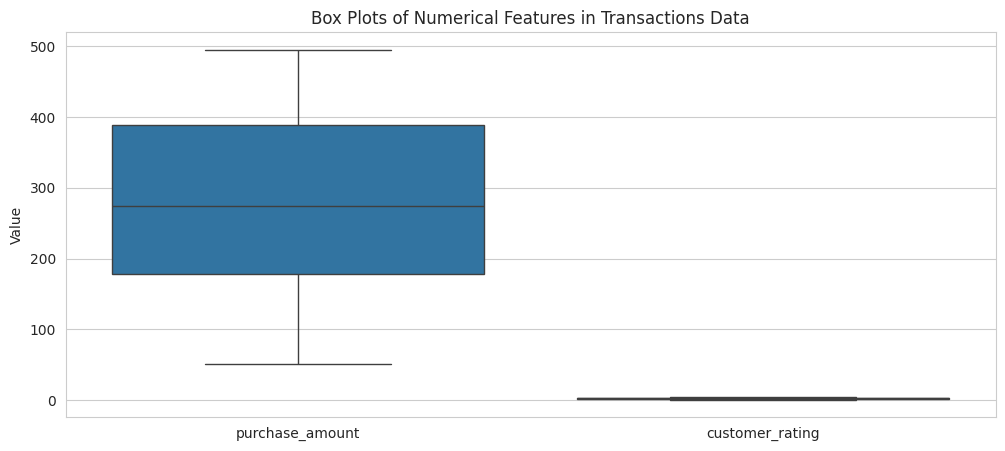

In [133]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=transactions[['purchase_amount', 'customer_rating']])
plt.title('Box Plots of Numerical Features in Transactions Data')
plt.ylabel('Value')
plt.show()

### Correlation Heatmap for Social Profiles Data

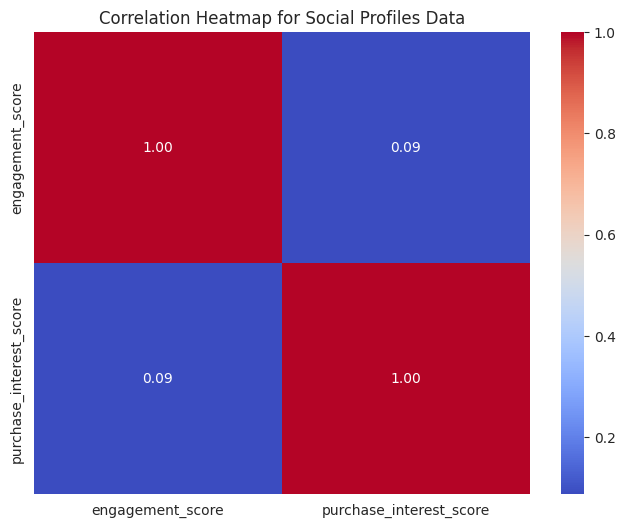

In [134]:
plt.figure(figsize=(8, 6))
sns.heatmap(social[['engagement_score', 'purchase_interest_score']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Social Profiles Data')
plt.show()

### Correlation Heatmap for Transactions Data

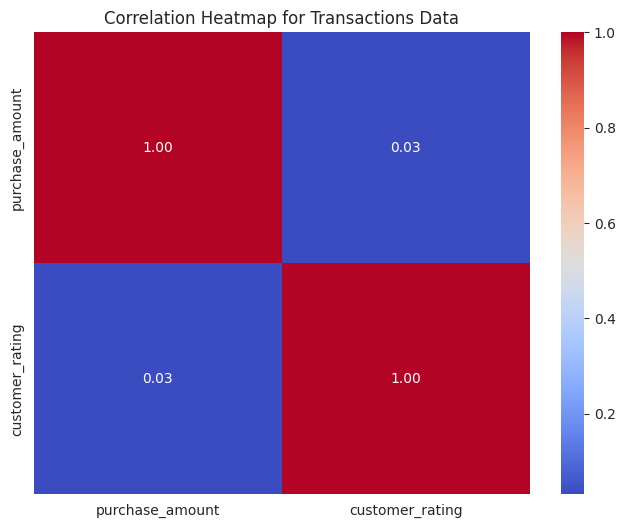

In [135]:
plt.figure(figsize=(8, 6))
sns.heatmap(transactions[['purchase_amount', 'customer_rating']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Transactions Data')
plt.show()

## Data Cleaning

## Handling Missing Values

In [136]:
transactions['customer_rating'].fillna(transactions['customer_rating'].mean(), inplace=True)

## Handle Duplicates

In [137]:
transactions = transactions.drop_duplicates()

## Change Data Types

In [138]:
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id_legacy  150 non-null    int64         
 1   transaction_id      150 non-null    int64         
 2   purchase_amount     150 non-null    int64         
 3   purchase_date       150 non-null    datetime64[ns]
 4   product_category    150 non-null    object        
 5   customer_rating     150 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 7.2+ KB


In [139]:
social['customer_id_new'] = social['customer_id_new'].str.extract('(\\d+)').astype(int)
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          155 non-null    int64  
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 6.2+ KB


## Data Merge

In [140]:
# checking missing values again
missing_trans = transactions.isnull().sum()
missing_trans_pct = (missing_trans / len(transactions)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_trans,
    'Percentage': missing_trans_pct
})
display(missing_info[missing_info['Missing Count'] > 0])

Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

In [141]:
social.rename(columns={'customer_id_new': 'customer_id'}, inplace=True)
transactions.rename(columns={'customer_id_legacy' : "customer_id"}, inplace=True)
print(social.info(), transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              155 non-null    int64  
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 6.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       150 non-null    int64         
 1   transaction_id    150 non-null    int64         
 2   purchase_amount   150 non-null    int64         
 3   purchase_date     150 non-null    datetime64[ns]
 4   product_category  150 n

In [142]:
merged = pd.merge(
    social,
    transactions,
    on='customer_id',
    how='inner'      #only customers present in both datasets
)
merged.head()

customer_id social_media_platform  engagement_score  \
0          190               Twitter                82   
1          190               Twitter                82   
2          150              Facebook                96   
3          150              Facebook                96   
4          162               Twitter                89   

   purchase_interest_score review_sentiment  transaction_id  purchase_amount  \
0                      4.8          Neutral            1031              333   
1                      4.8          Neutral            1140              401   
2                      1.6         Positive            1042              389   
3                      1.6         Positive            1046              177   
4                      2.6         Positive            1079              101   

  purchase_date product_category  customer_rating  
0    2024-01-31        Groceries            3.800  
1    2024-05-19           Sports            4.900  
2    2024-02-11           Sports            2.985  
3    2024-02-15            Books            3.600  
4    2024-03-19            Books            4.200

In [143]:
merged['customer_id'].value_counts().head()

customer_id
187    15
189    15
103     9
107     9
120     9
Name: count, dtype: int64

In [144]:
tx_agg = transactions.groupby('customer_id').agg({
    'purchase_amount': 'mean',
    'product_category': lambda x: x.mode()[0],
    'customer_rating': 'mean'
}).reset_index()
merged = pd.merge(social, tx_agg, on='customer_id', how='inner')

In [145]:
merged['customer_id'].value_counts().head()

customer_id
189    5
125    5
185    4
151    3
150    3
Name: count, dtype: int64

In [146]:
merged.head()

customer_id social_media_platform  engagement_score  \
0          190               Twitter                82   
1          150              Facebook                96   
2          162               Twitter                89   
3          151                TikTok                61   
4          137              LinkedIn                93   

   purchase_interest_score review_sentiment  purchase_amount product_category  \
0                      4.8          Neutral            367.0        Groceries   
1                      1.6         Positive            283.0            Books   
2                      2.6         Positive            222.0            Books   
3                      1.3          Neutral            408.0           Sports   
4                      3.5          Neutral            286.0      Electronics   

   customer_rating  
0           4.3500  
1           3.2925  
2           2.8000  
3           2.3000  
4           3.2000

In [147]:
merged.to_csv("merged_features.csv", index=False)
print("Saved: merged_features.csv")

Saved: merged_features.csv


## Image Data Section

## Loading Images

In [148]:
import cv2
import matplotlib.pyplot as plt
import os

IMAGE_FOLDER = "/content/images"

members = os.listdir(IMAGE_FOLDER)
members

['Mwai_surprised.jpeg',
 'Blessing_smile.jpeg',
 'Liliane_surprised.jpeg',
 'Mwai_neutral.jpeg',
 'Mwai_smile.jpeg',
 'Blessing_neutral.jpeg',
 'Blessing_surprised.jpeg',
 'Mitali_neutral.jpeg',
 'Liliane_smile.jpeg',
 'Mitali_smile.jpeg',
 'Mitali_surprised.jpeg',
 'Liliane_neutral.jpeg']

Image: Mwai_surprised.jpeg


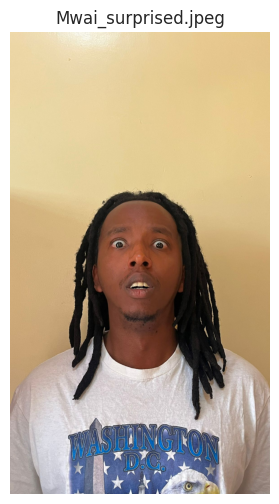

Image: Blessing_smile.jpeg


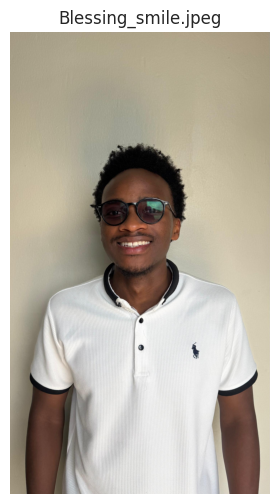

Image: Liliane_surprised.jpeg


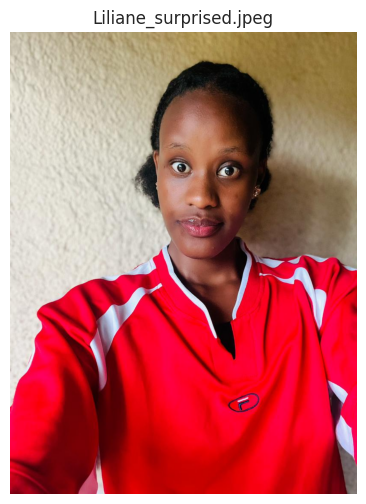

Image: Mwai_neutral.jpeg


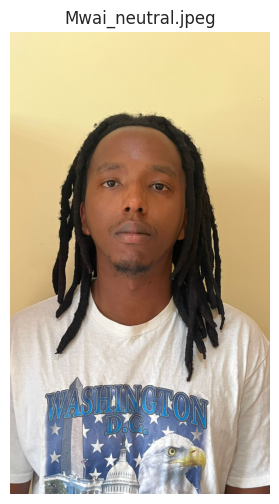

Image: Mwai_smile.jpeg


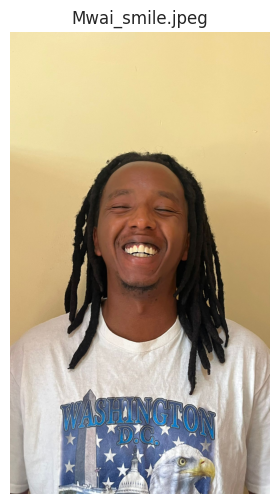

Image: Blessing_neutral.jpeg


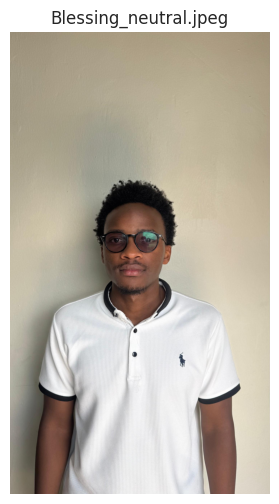

Image: Blessing_surprised.jpeg


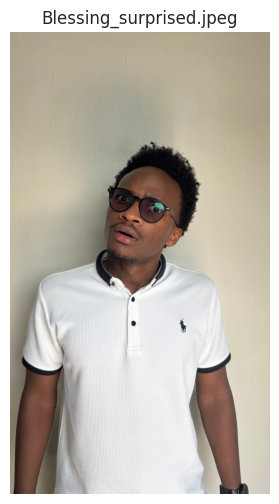

Image: Mitali_neutral.jpeg


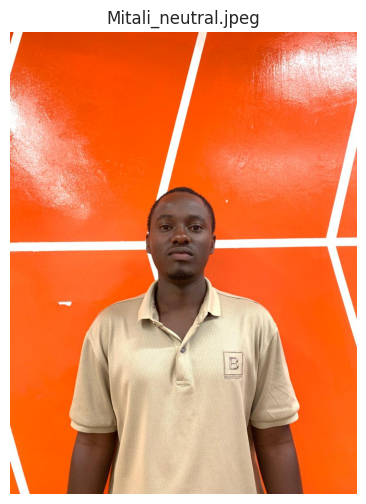

Image: Liliane_smile.jpeg


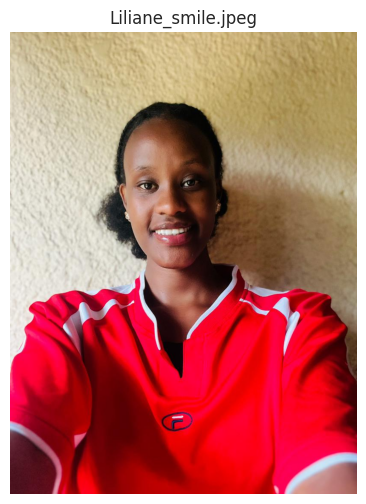

Image: Mitali_smile.jpeg


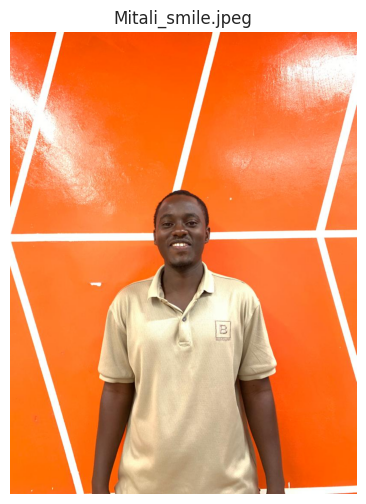

Image: Mitali_surprised.jpeg


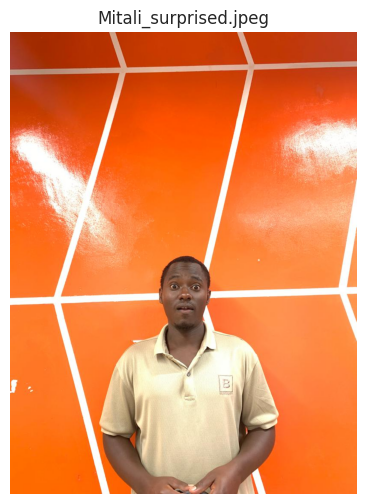

Image: Liliane_neutral.jpeg


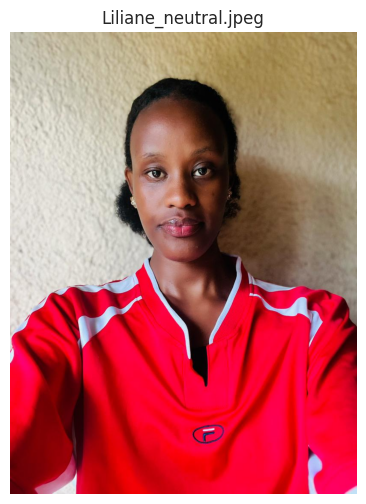

In [149]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Display samples
for member_img_name in members:
    print(f"Image: {member_img_name}")
    image_path = os.path.join(IMAGE_FOLDER, member_img_name)

    img = load_image(image_path)
    plt.imshow(img)
    plt.title(member_img_name)
    plt.axis("off")
    plt.show()

## Augmenting Images

In [150]:
def augment_image(img):
    # rotation
    rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

    # flip
    flipped = cv2.flip(img, 1)

    # grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    return rotated, flipped, gray

## Using MobileNetV2 to extract Features

In [151]:
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

model = MobileNetV2(weights="imagenet", include_top=False, pooling='avg')

def extract_embedding(img):
    resized = cv2.resize(img, (224, 224))
    # Convert grayscale images to 3 channels by stacking
    if len(resized.shape) == 2:
        resized = np.stack((resized,)*3, axis=-1)
    arr = img_to_array(resized)
    arr = np.expand_dims(arr, axis=0)
    arr = preprocess_input(arr)
    embedding = model.predict(arr)
    return embedding.flatten()

## Extracting and saving all images into csv

In [152]:
image_features = []

for member_filename in members:
    # Extract person's name (e.g., 'Mwai') from the filename
    person_name = member_filename.split('_')[0]

    image_path = os.path.join(IMAGE_FOLDER, member_filename)
    img = load_image(image_path)
    rotated, flipped, gray = augment_image(img)

    for version, label in zip([img, rotated, flipped, gray],
                              ["original", "rotated", "flipped", "grayscale"]):

        emb = extract_embedding(version)
        # Use person_name for the 'member' column and member_filename for the 'img' column
        row = [person_name, member_filename, label] + emb.tolist()
        image_features.append(row)

# convert to DF
cols = ["member", "img", "aug_type"] + [f"f{i}" for i in range(len(image_features[0]) - 3)]
image_df = pd.DataFrame(image_features, columns=cols)

# save
image_df.to_csv("image_features.csv", index=False)
image_df.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━

member                  img   aug_type        f0        f1        f2  \
0      Mwai  Mwai_surprised.jpeg   original  0.000000  0.559404  0.070738   
1      Mwai  Mwai_surprised.jpeg    rotated  0.731860  0.371484  0.074999   
2      Mwai  Mwai_surprised.jpeg    flipped  0.012750  0.842781  0.116309   
3      Mwai  Mwai_surprised.jpeg  grayscale  0.415998  1.500616  0.126328   
4  Blessing  Blessing_smile.jpeg   original  0.023011  0.083709  0.000371   

         f3        f4        f5        f6        f7        f8        f9  \
0  0.352310  0.130884  1.183560  0.000000  1.549163  0.655051  0.000000   
1  2.379741  1.169223  0.980075  0.250899  1.961747  0.089950  0.024115   
2  0.558861  0.145483  0.819912  0.047586  1.574844  0.671321  0.000000   
3  0.319494  0.542288  2.185413  0.078988  0.089009  0.278141  0.096179   
4  0.361977  0.408091  0.020130  1.332223  0.871874  0.000000  0.582351   

        f10       f11       f12       f13       f14       f15       f16  \
0  1.360518  0.118802  0.098193  0.000000  0.018505  0.102043  0.007009   
1  1.017644  0.004861  0.005966  1.834652  0.205263  0.000000  0.000000   
2  0.863316  0.100103  0.114884  0.027115  0.131315  0.259863  0.000000   
3  0.162508  0.000000  0.000000  0.000000  0.033110  0.015286  0.032510   
4  0.693810  1.098993  0.078577  0.189560  0.818209  0.100915  0.000000   

        f17       f18       f19       f20       f21       f22       f23  \
0  0.022656  1.456604  0.139581  0.973650  0.140277  1.131914  0.158151   
1  2.189031  0.025061  1.441460  0.433514  0.123021  0.644740  1.933753   
2  0.013431  0.377580  0.252038  0.926741  0.044678  0.197573  0.222368   
3  0.007667  0.341590  0.035397  0.591780  0.063995  0.534435  0.337524   
4  0.028478  0.361710  0.083684  0.000000  0.044598  0.898970  0.087775   

        f24       f25       f26       f27       f28       f29       f30  \
0  0.333418  0.000000  0.338218  0.115842  1.865750  0.035154  0.000000   
1  0.159690  0.000000  1.705965  0.248618  0.048732  0.830708  0.000000   
2  0.292166  0.000000  0.019372  0.074527  2.226148  0.048144  0.285297   
3  0.212210  0.000000  0.113613  0.110383  1.700697  0.174903  0.004694   
4  0.031851  0.505331  0.044601  0.000000  0.393386  0.000000  0.136771   

        f31       f32       f33       f34       f35       f36       f37  \
0  0.000000  0.205715  0.110122  0.381704  0.939671  0.297663  0.254566   
1  0.374093  0.831916  0.739117  0.096560  0.077408  0.777675  1.336606   
2  0.042930  0.198558  0.175660  0.145637  1.181664  0.357198  0.396285   
3  0.731258  1.194031  0.249553  0.956244  1.169480  0.303701  0.404798   
4  0.000000  1.665474  0.678675  1.352815  2.564723  0.000000  0.024122   

        f38       f39       f40       f41       f42       f43       f44  \
0  0.142326  0.012562  0.000000  0.010974  0.025826  0.023727  0.808317   
1  0.000000  0.064382  0.000000  0.036476  1.453940  0.557072  0.000000   
2  0.206799  0.005900  0.000000  0.120887  0.005907  0.196845  0.500463   
3  0.076065  0.024536  0.000000  0.068446  0.211077  0.652374  0.812961   
4  0.497064  0.039327  0.005812  1.105075  0.000000  0.256703  1.136879   

        f45       f46       f47       f48       f49       f50       f51  \
0  0.193945  0.026284  1.411680  0.168508  0.278623  0.000000  1.613154   
1  0.084777  0.528339  1.159759  0.877049  0.793302  0.000000  0.438796   
2  0.121282  0.000000  1.148245  0.264138  0.245941  0.014007  1.881045   
3  0.068907  0.449946  0.415356  1.049561  0.025777  0.000000  1.426470   
4  0.083755  0.000000  0.403998  0.904563  0.931727  0.000000  0.503214   

       f52       f53       f54       f55       f56       f57       f58  \
0  0.00000  1.888272  0.000000  0.000000  0.457319  0.175656  0.000000   
1  0.49644  0.799970  0.562281  0.024809  0.018543  0.119102  0.191135   
2  0.00000  0.920068  0.000000  0.000000  0.395685  0.056137  0.020805   
3  0.00000  1.442784  0.059079  0.033848  0.378974  1.259550  0.027200   
4  0.00000  1.2

## Audio Section

## Importing Libraries

In [153]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Loading Data

In [154]:
audio_paths = {
    "Mwai_approve" : "/content/audios/mwai_approve.wav",
    "Mitali_approve" : "/content/audios/Mitali_approve.wav",
    "Liliane_approve" : "/content/audios/Liliane_approve.wav",
    "Blessing_approve" : "/content/audios/Blessing_approve.wav",
    "Mwai_confirm" : "/content/audios/mwai_confirm.wav",
    "Mitali_confirm" : "/content/audios/Mitali_confirm.wav",
    "Liliane_confirm" : "/content/audios/Liliane_confirm.wav",
    "Blessing_confirm" : "/content/audios/Blessing_confirm.wav"
}

## Visualization Functions

In [155]:
def plot_waveform(y, sr, title):
  plt.figure(figsize=(10, 3))
  librosa.display.waveshow(y, sr=sr)
  plt.title(f"Waveform - {title}")
  plt.tight_layout
  plt.show()

In [156]:
def plot_spectrogram(y, sr, title):
  from librosa.feature import melspectrogram as _melspectrogram_func
  S = _melspectrogram_func(y=y, sr=sr, n_mels=128)
  S_dB = librosa.power_to_db(S, ref=np.max)

  plt.figure(figsize=(10, 4))
  librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.tight_layout()
  plt.show()

## Augmentations

In [157]:
def augment_audio(y, sr):
  aug1 = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=2)
  aug2 = librosa.effects.time_stretch(y, rate = 1.2)
  aug3 = y + 0.005 * np.random.randn(len(y))
  return{"pitch_shift":aug1, "time_stretch":aug2, "noise":aug3}

## Feature Extraction

In [158]:
def extract_features(y, sr, label):
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
  energy = np.sum(y**2)

  feature_dict = {"label": label, "rolloff": rolloff, "energy": energy}
  for i in range(13):
    feature_dict[f"mfcc_{i}"] = mfcc[i]

  return feature_dict

## Audio + Augmentations

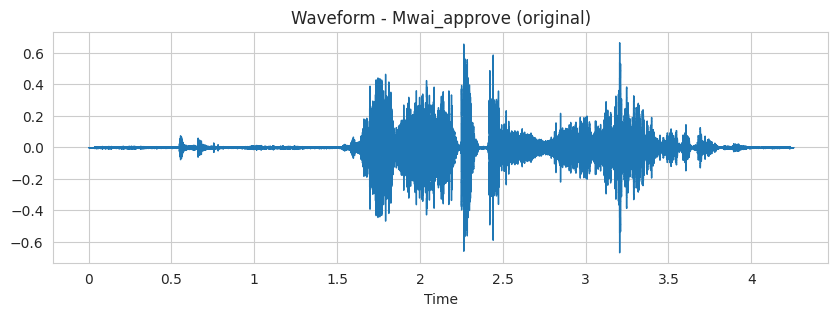

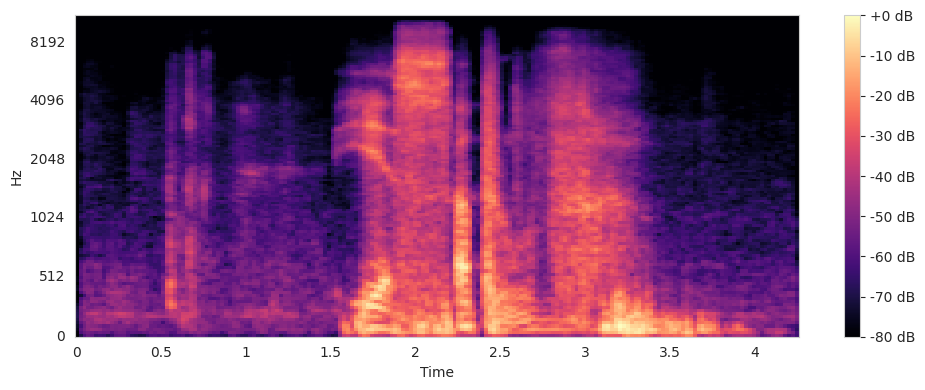

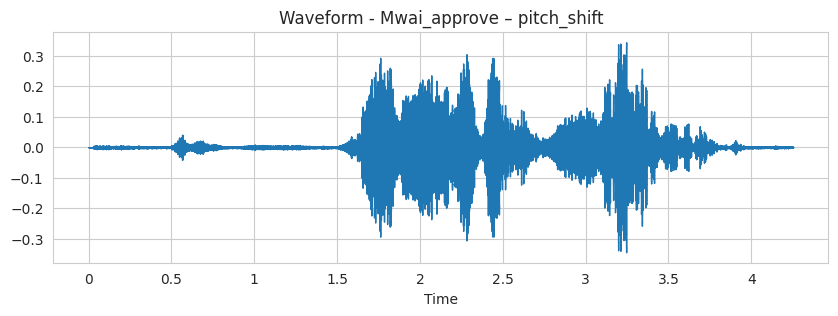

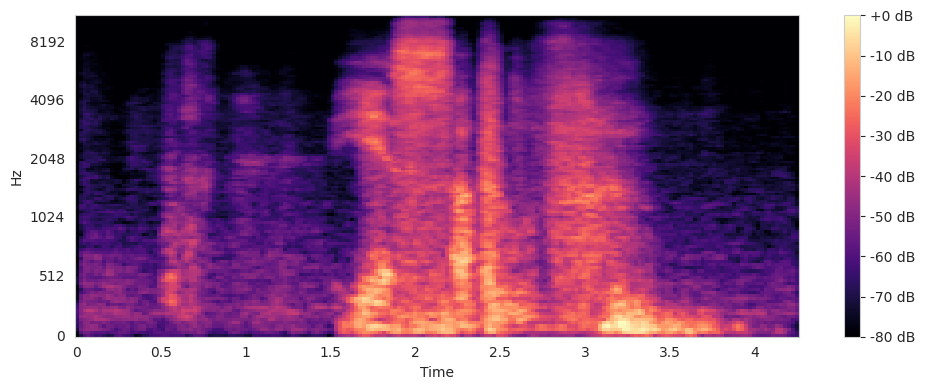

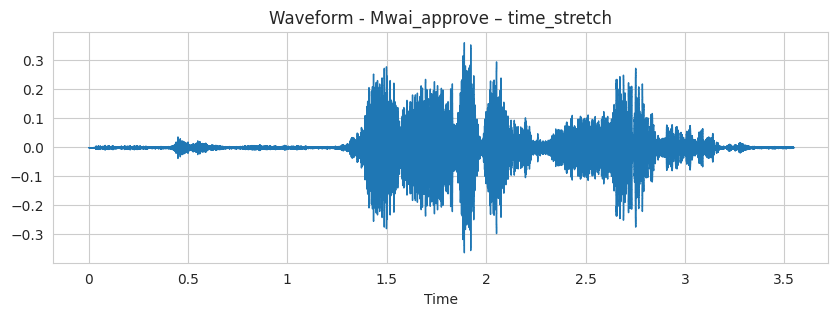

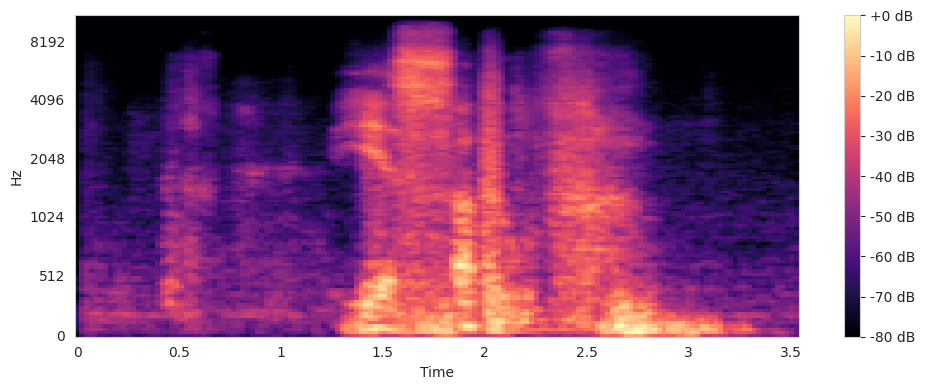

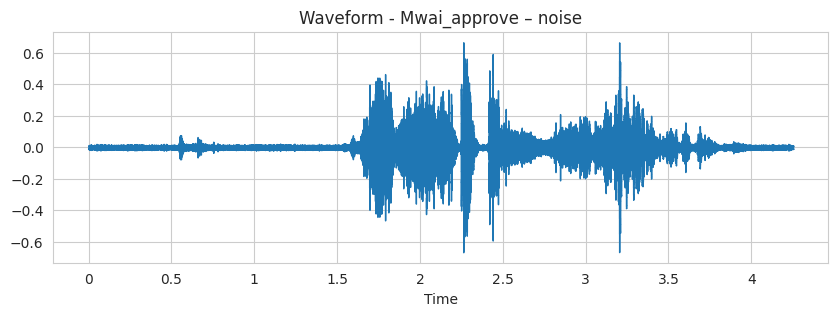

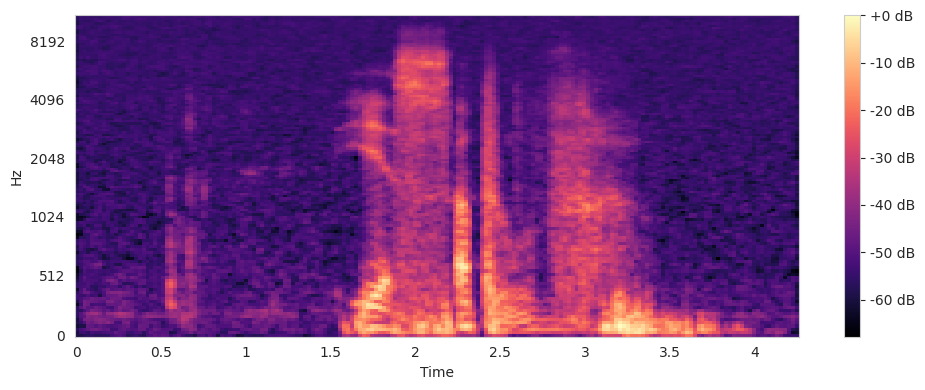

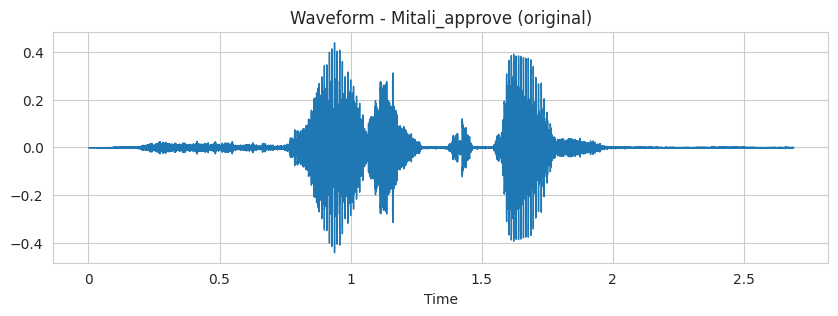

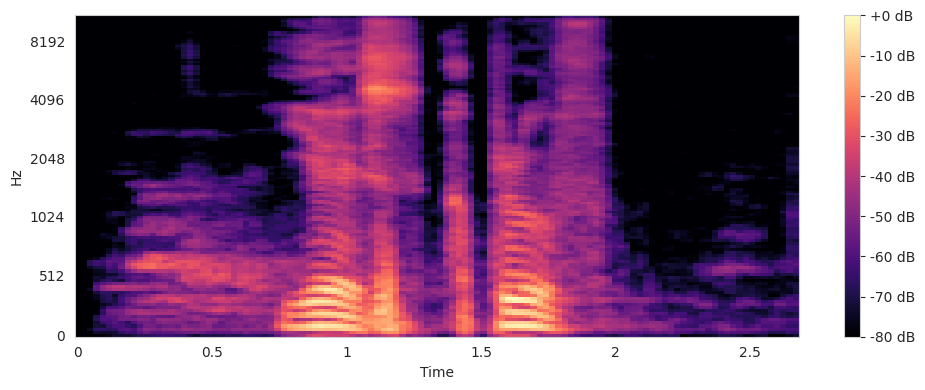

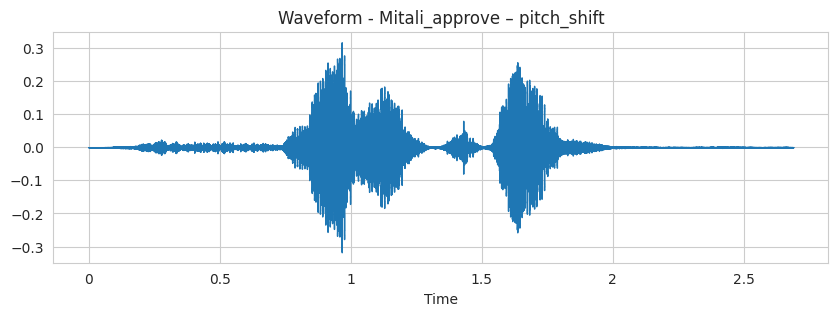

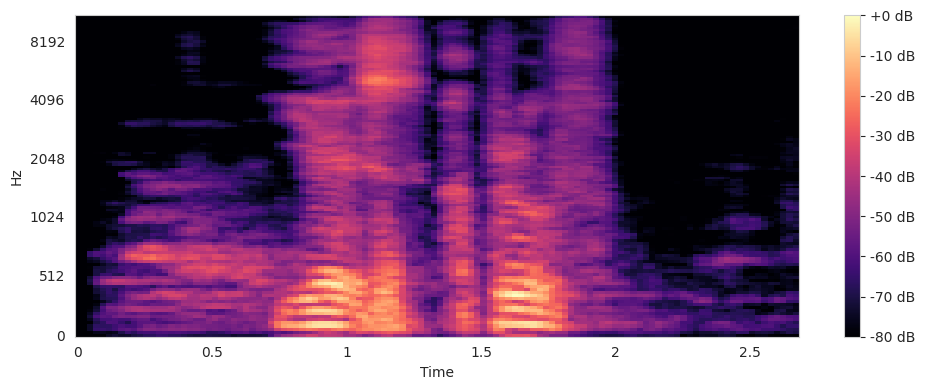

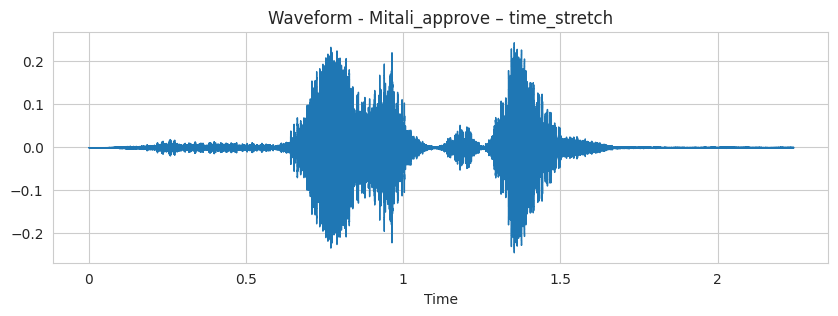

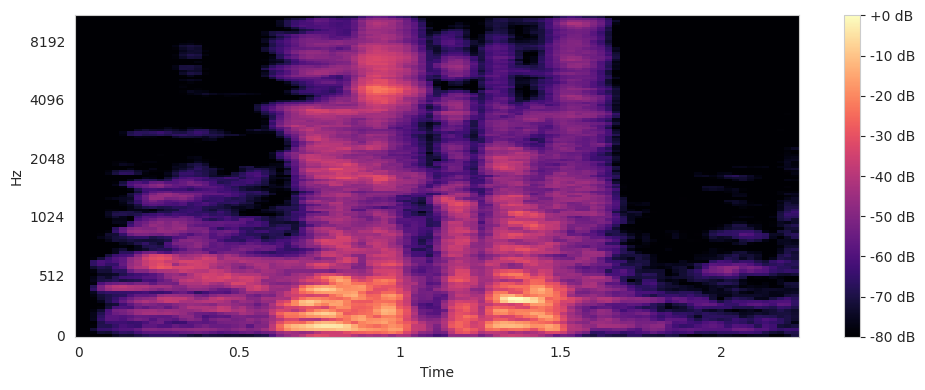

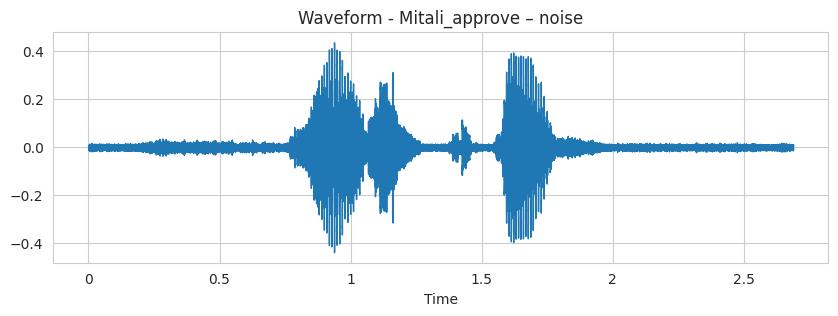

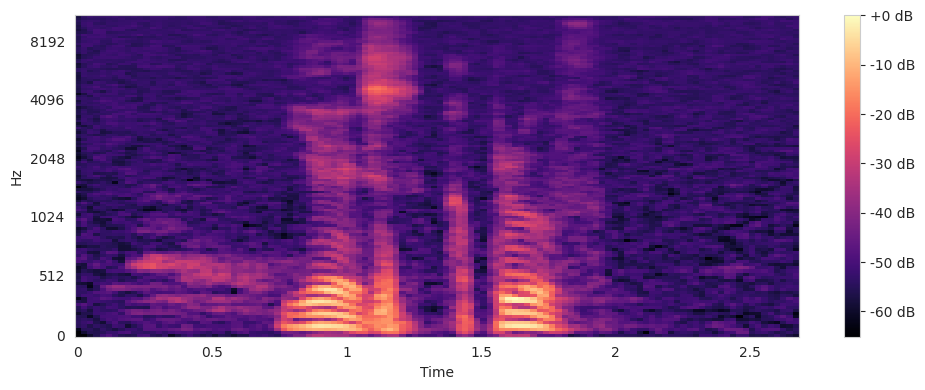

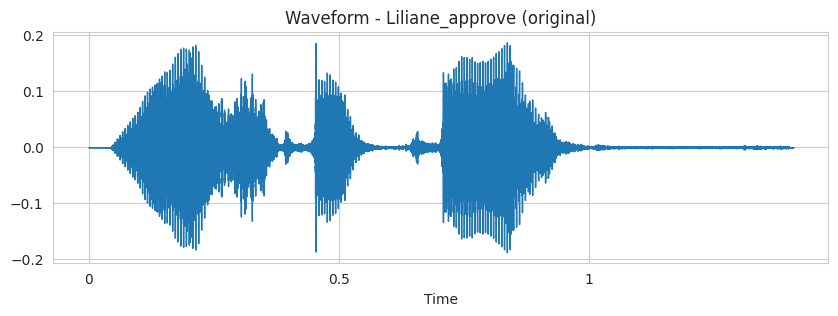

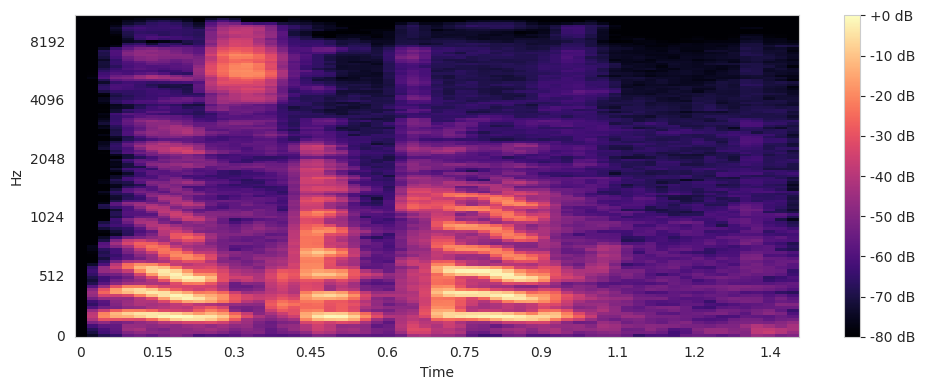

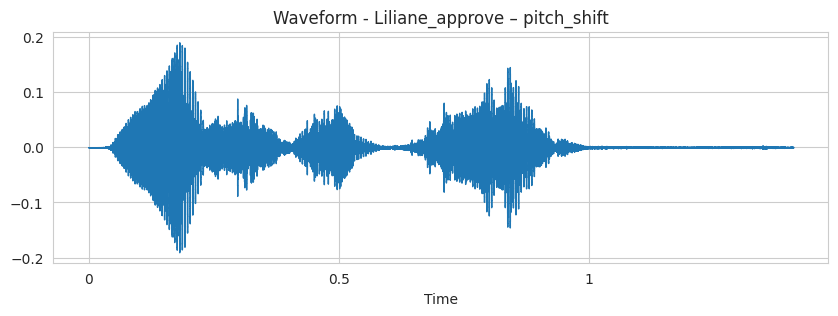

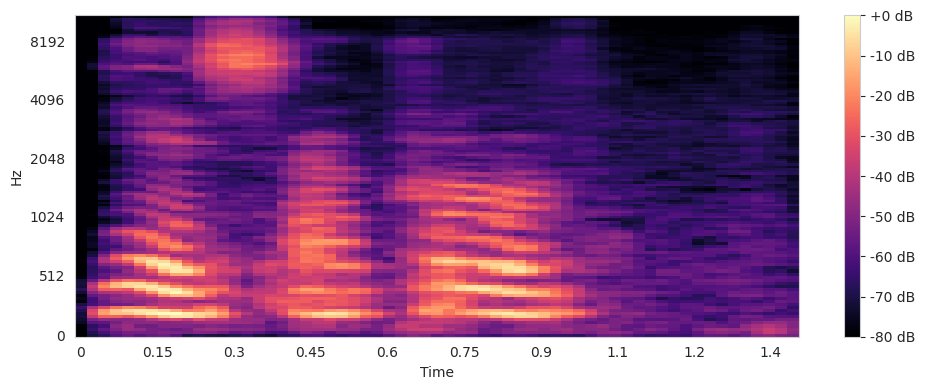

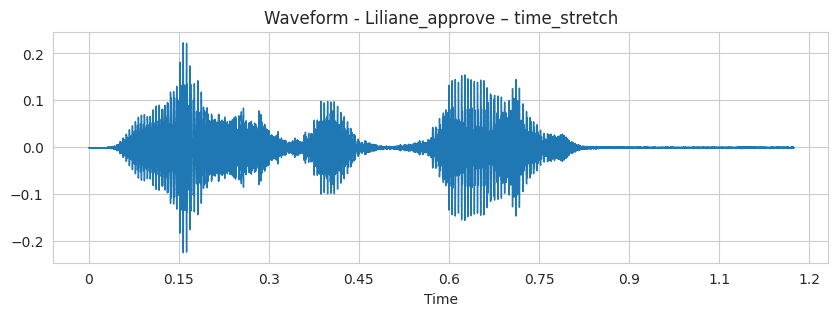

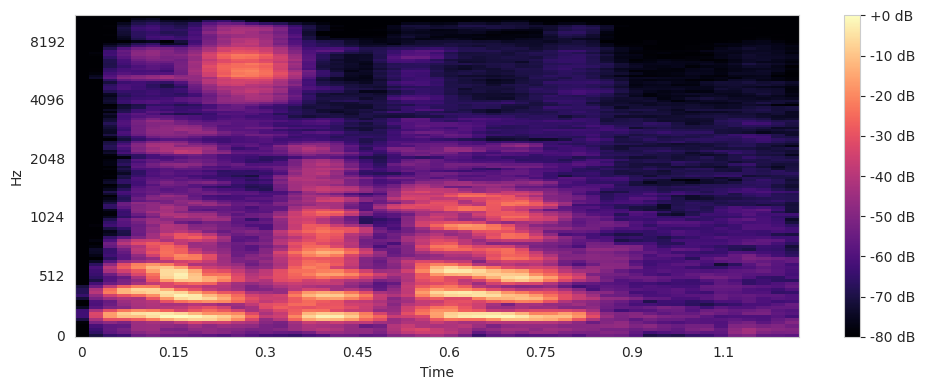

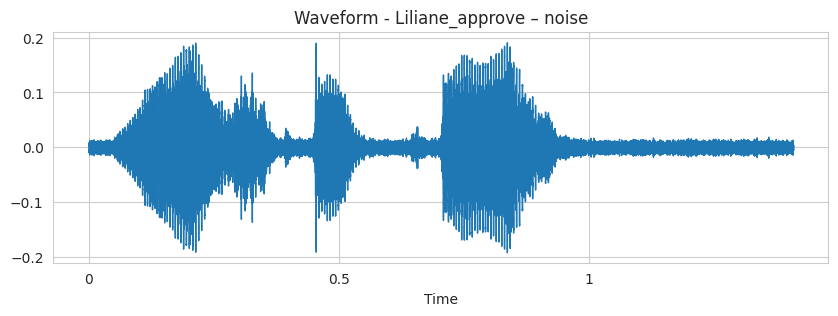

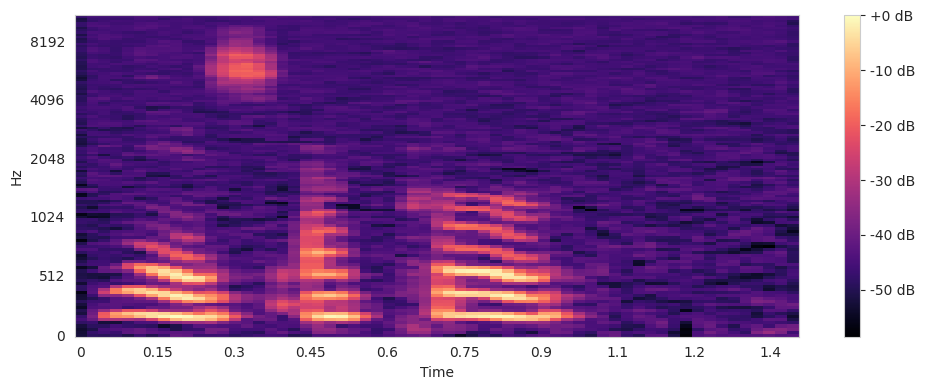

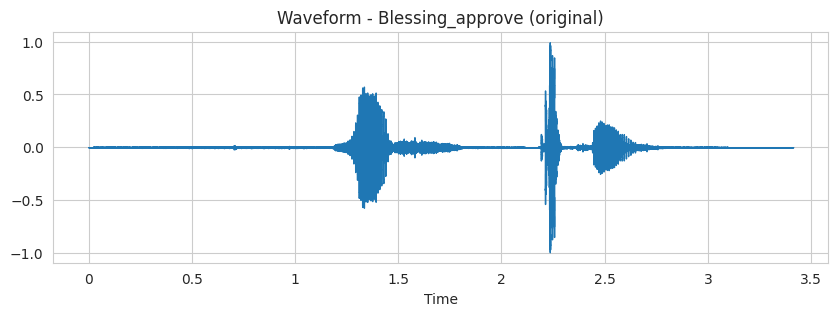

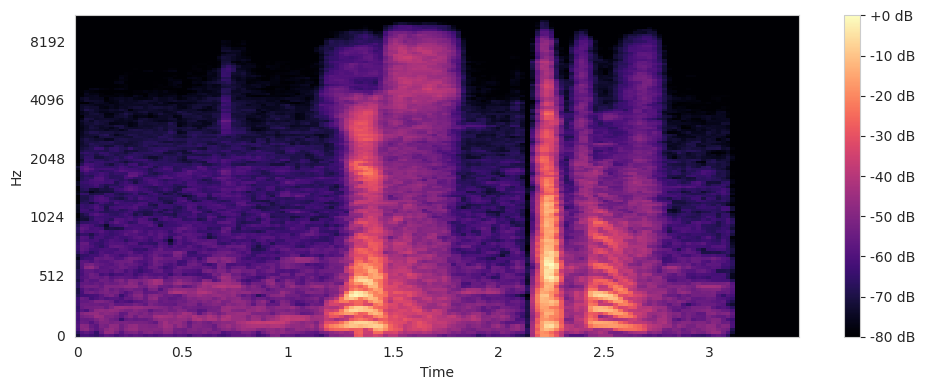

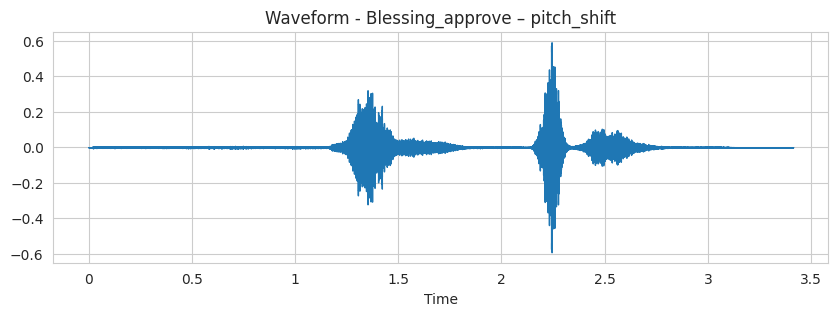

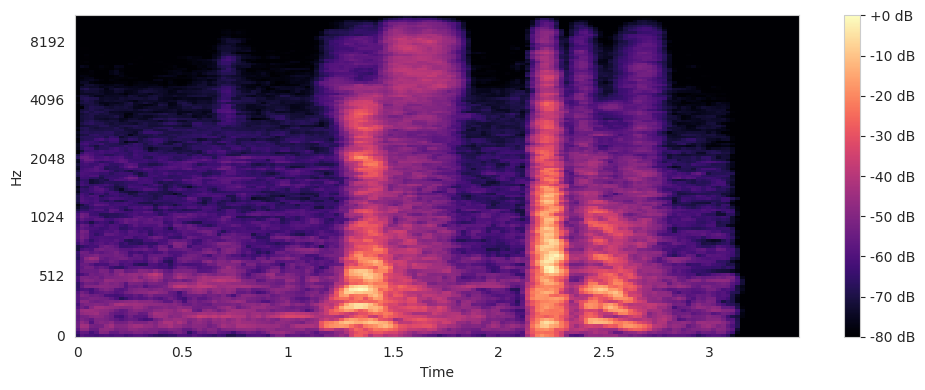

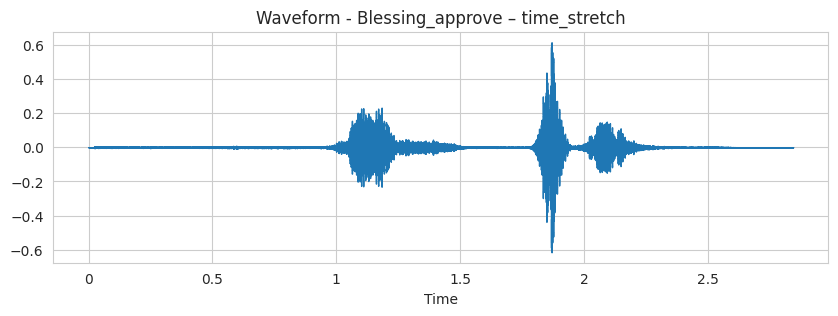

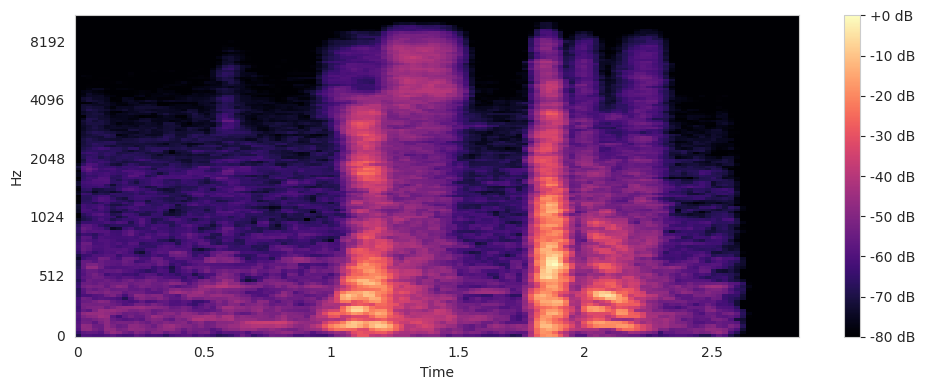

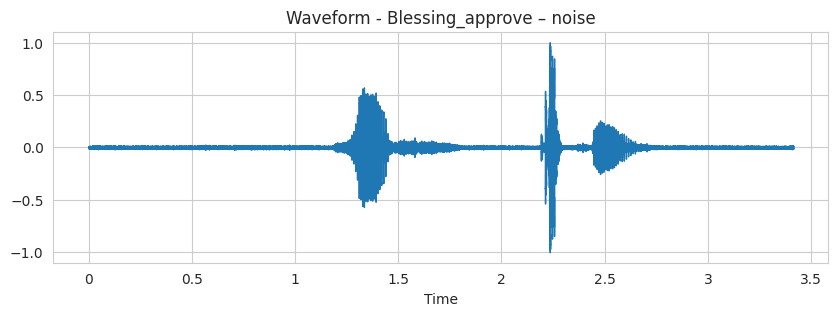

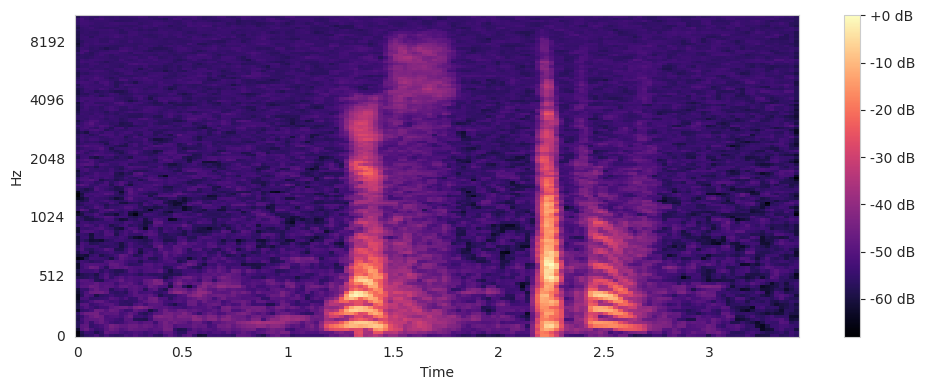

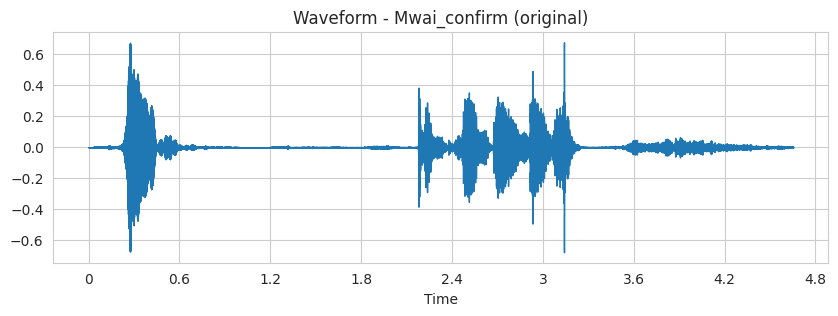

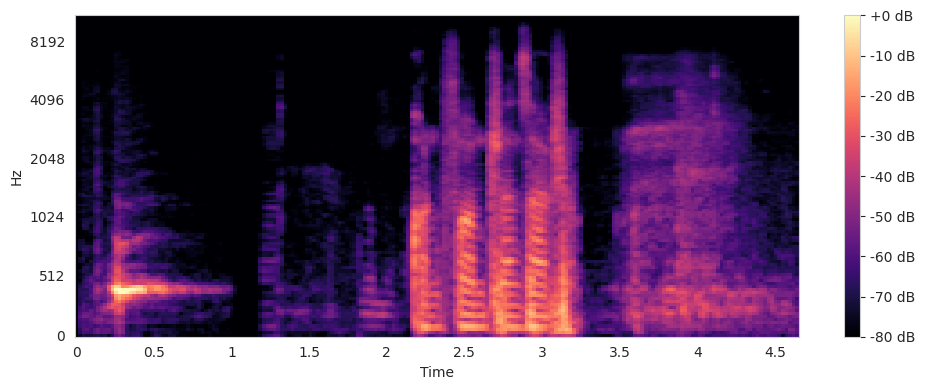

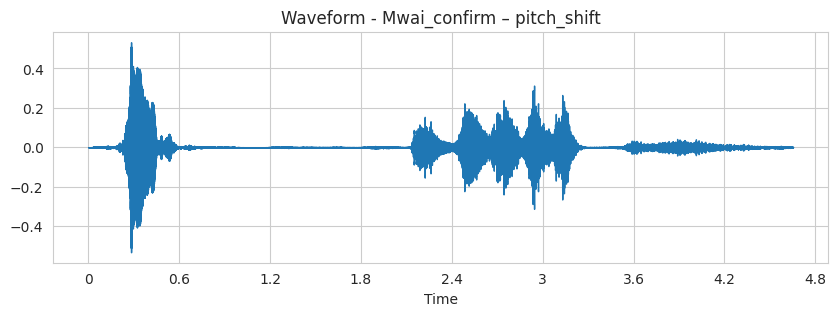

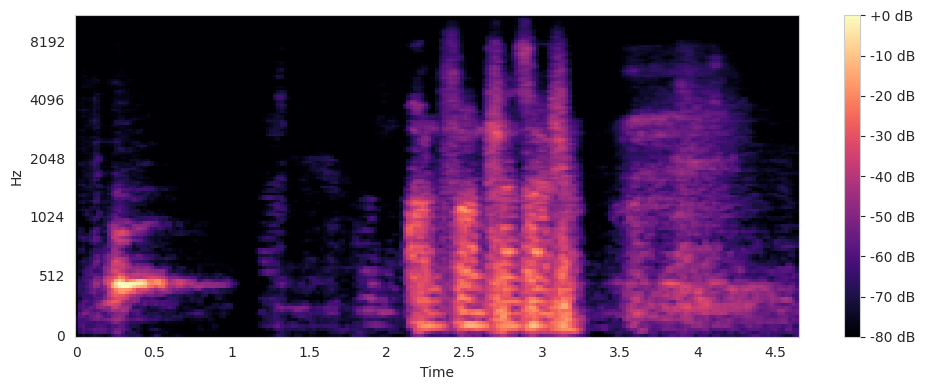

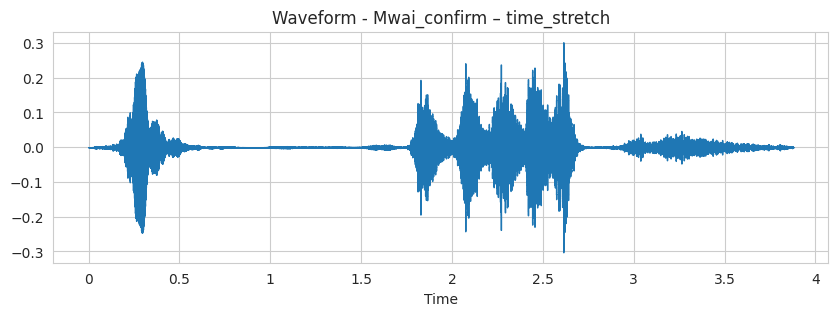

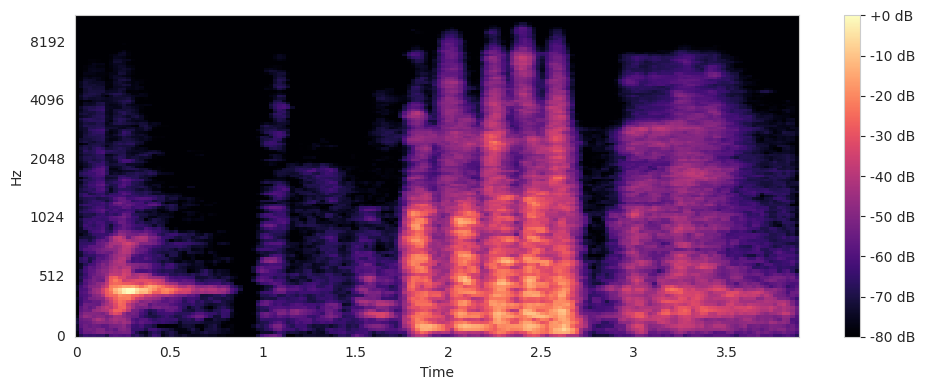

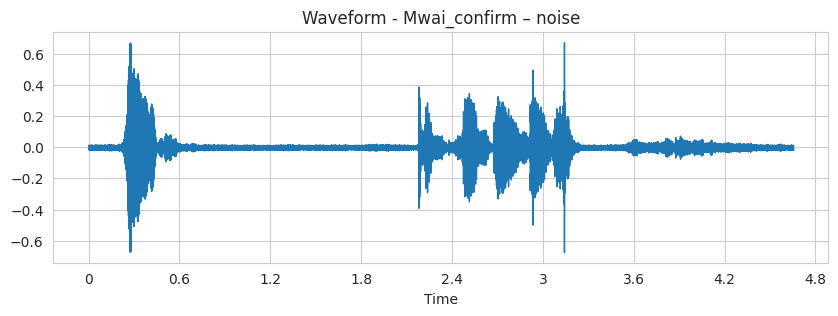

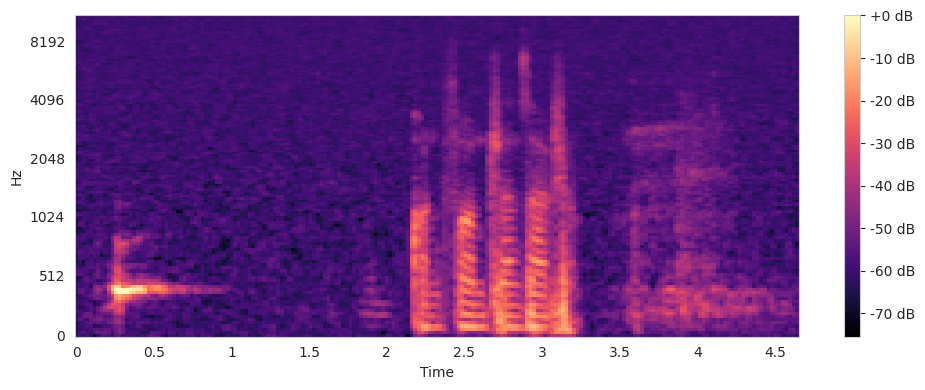

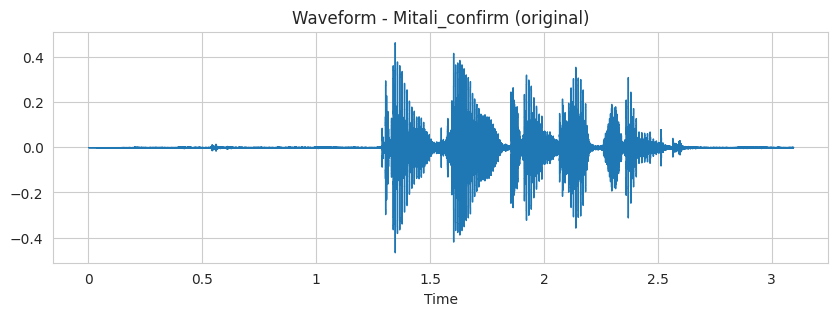

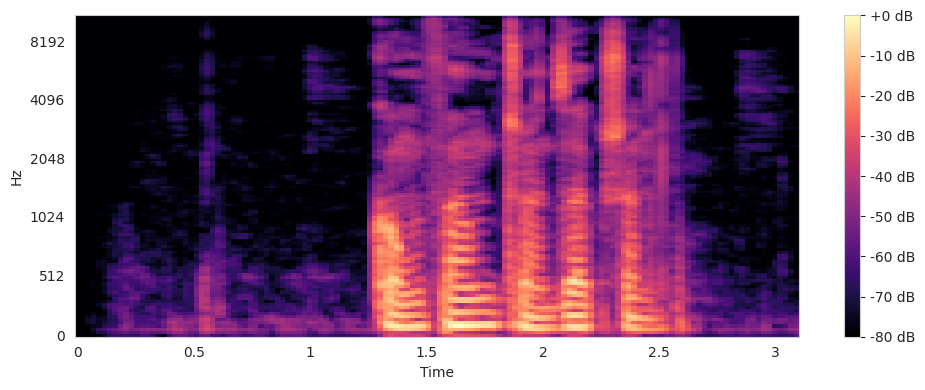

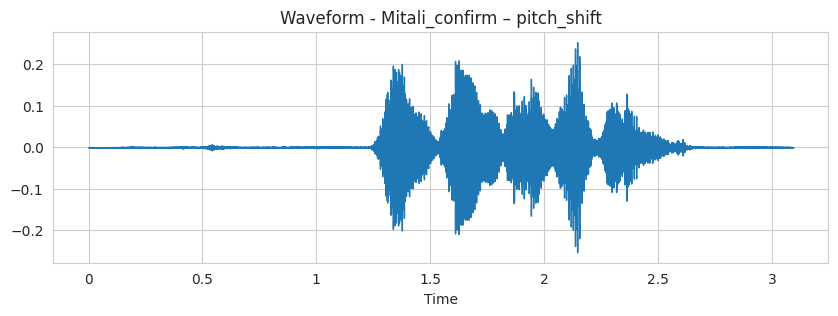

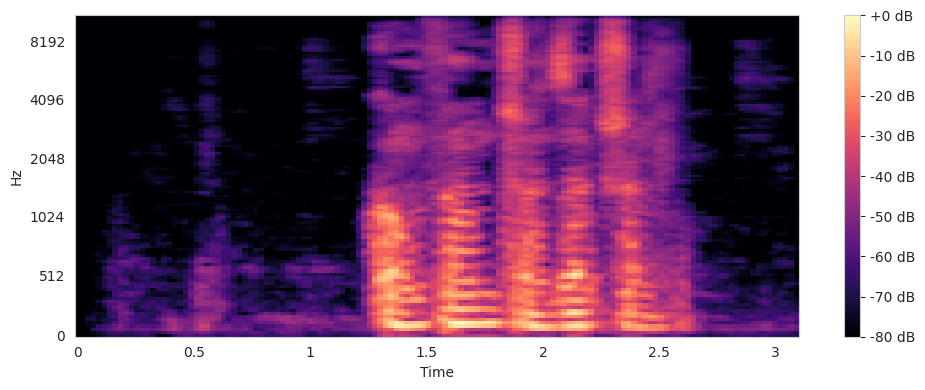

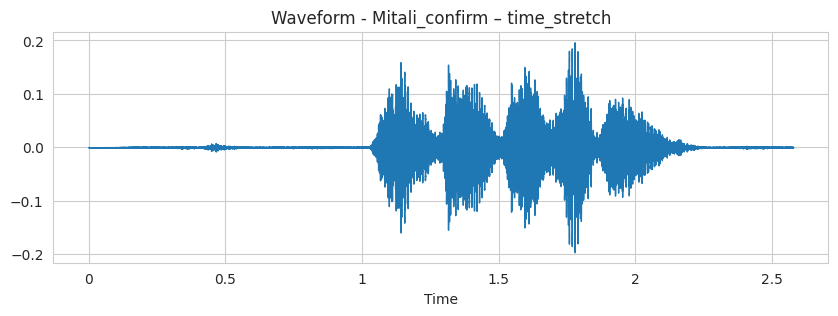

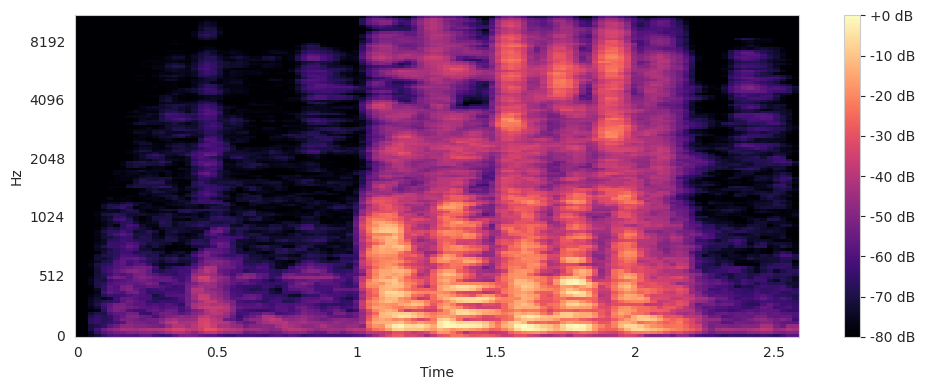

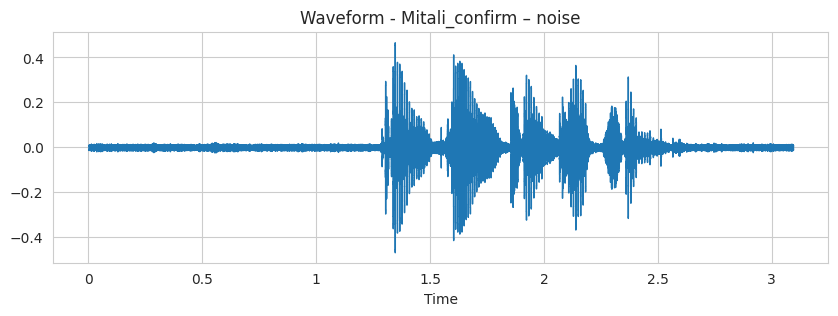

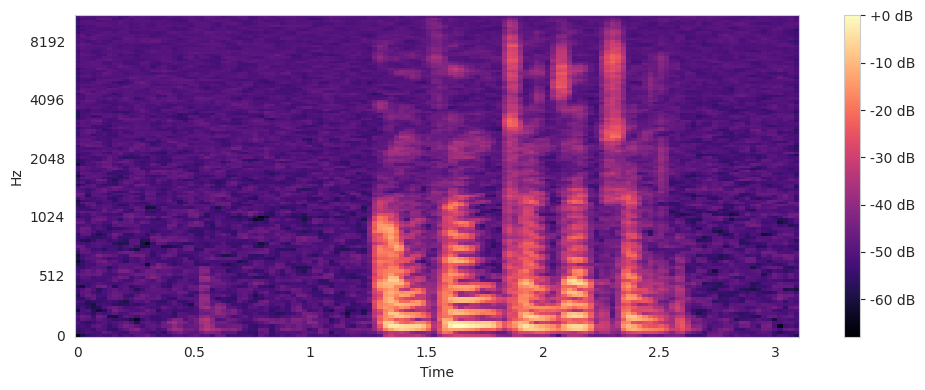

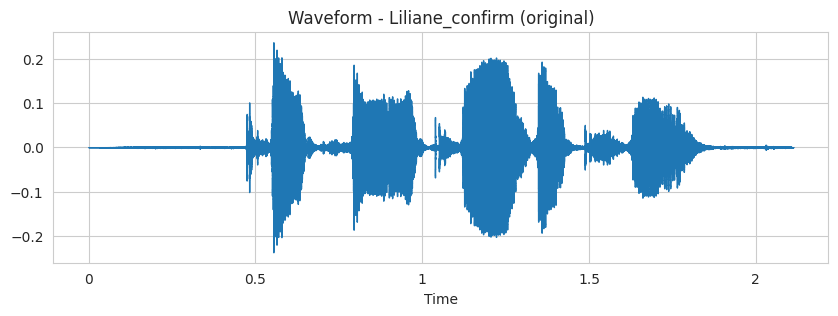

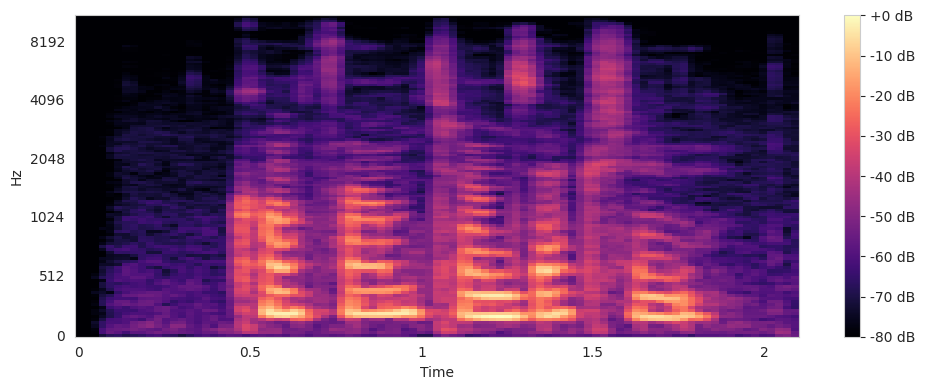

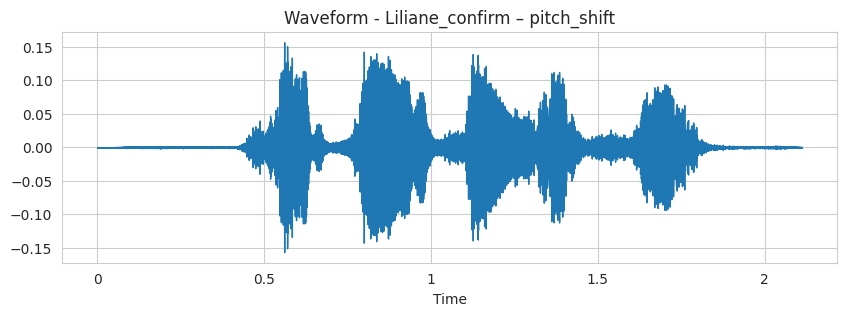

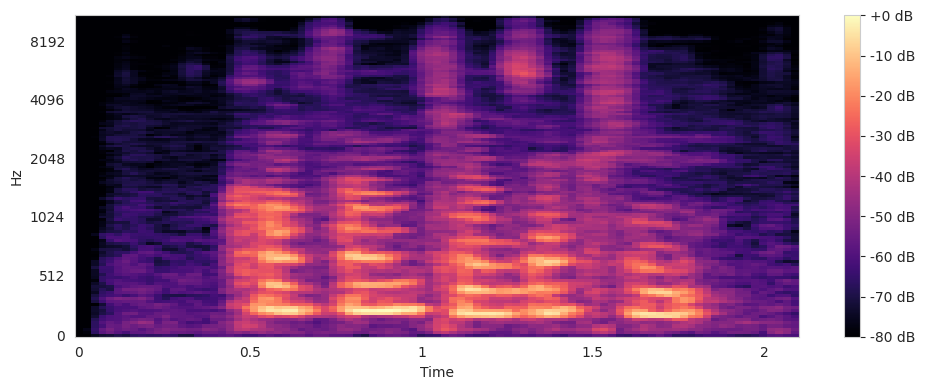

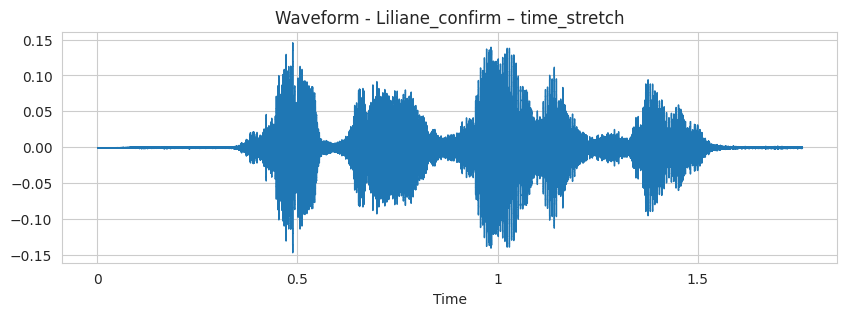

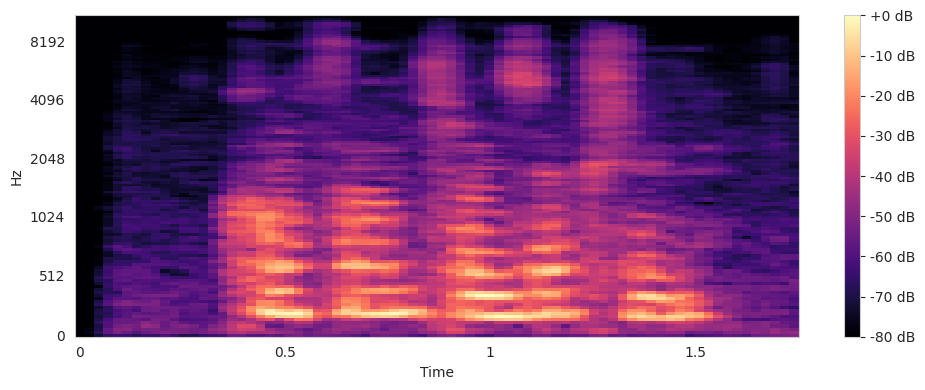

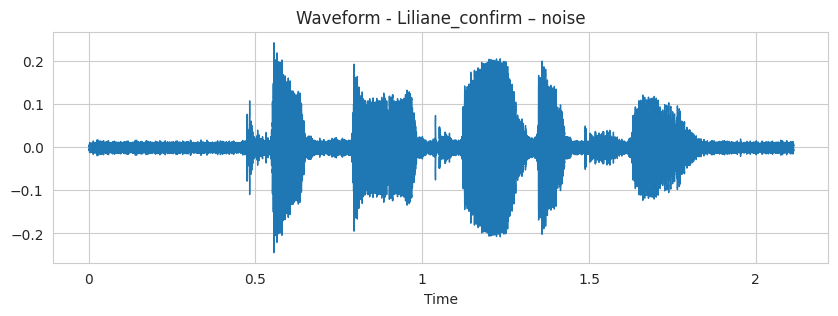

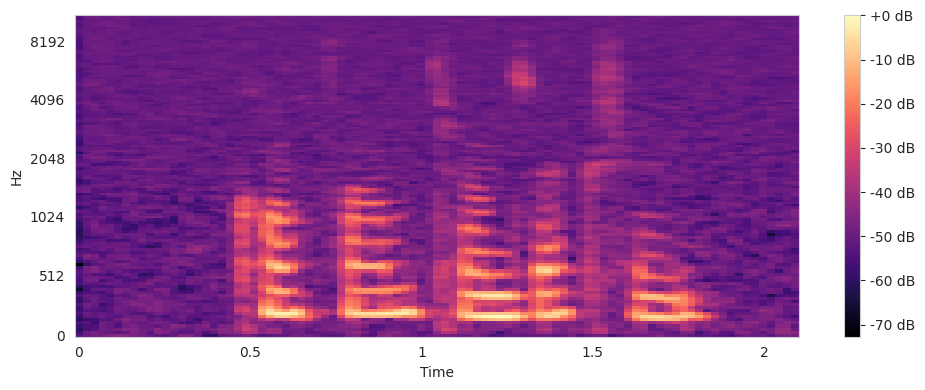

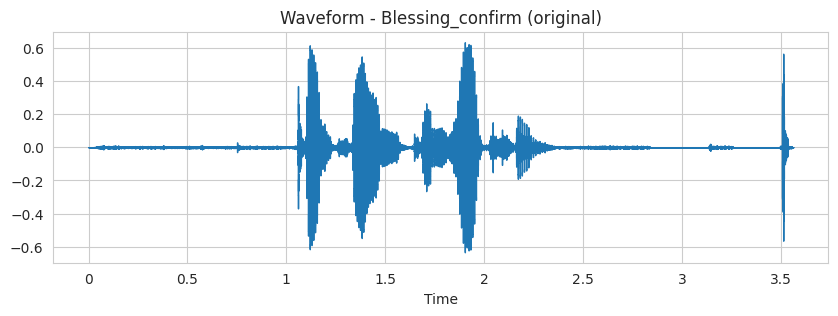

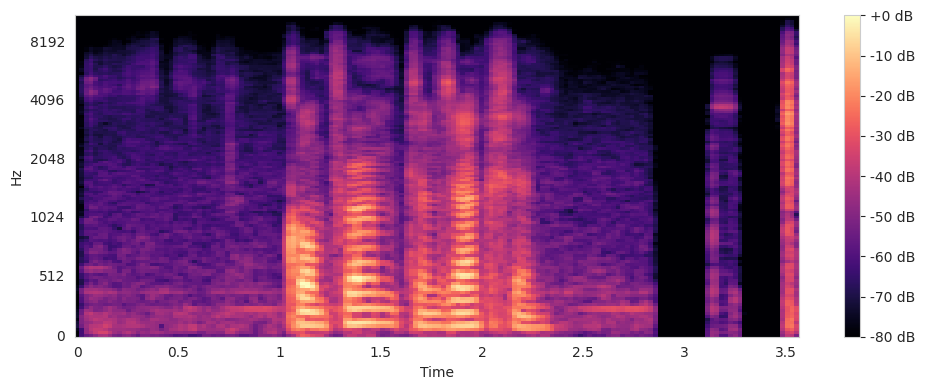

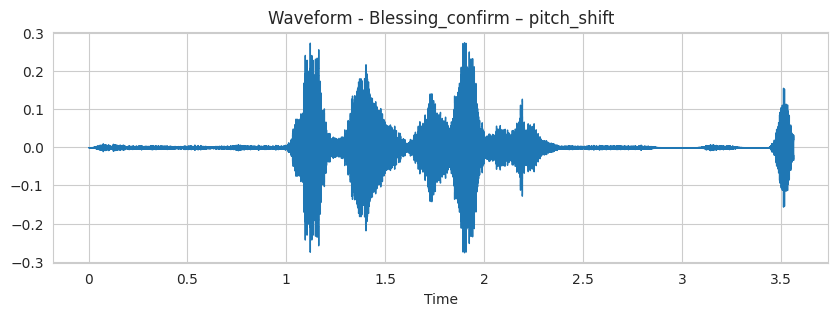

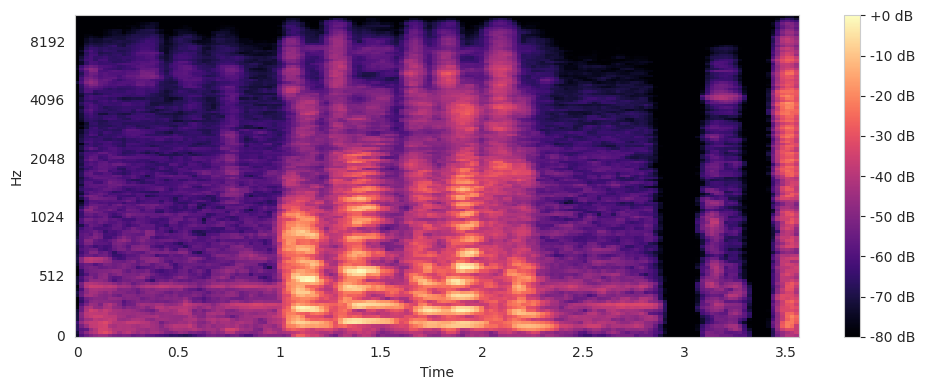

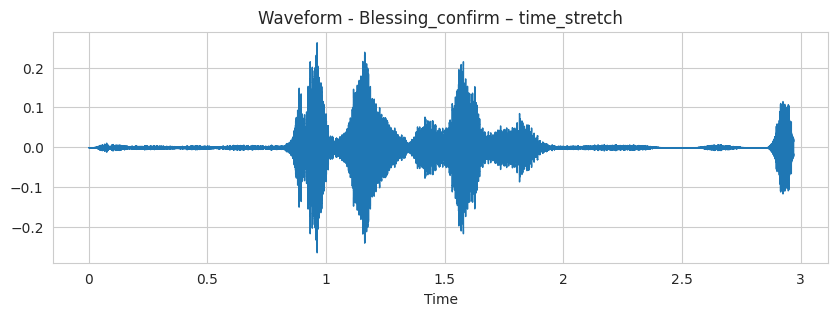

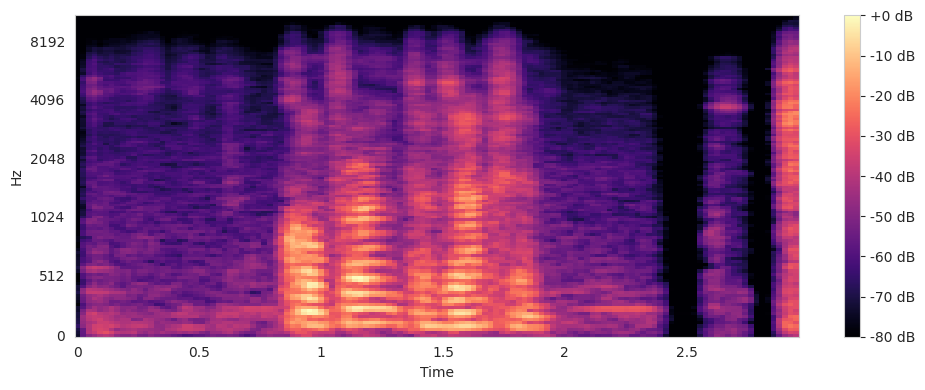

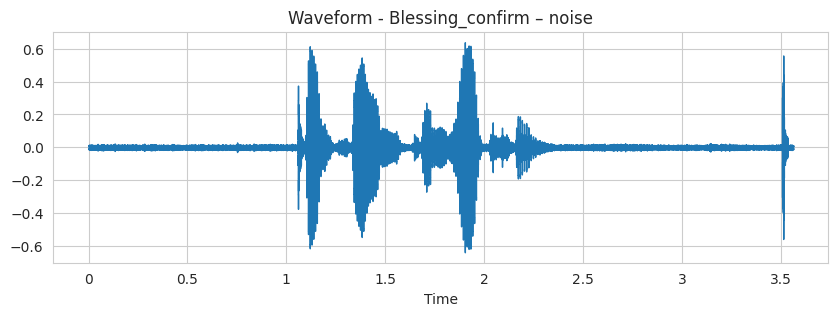

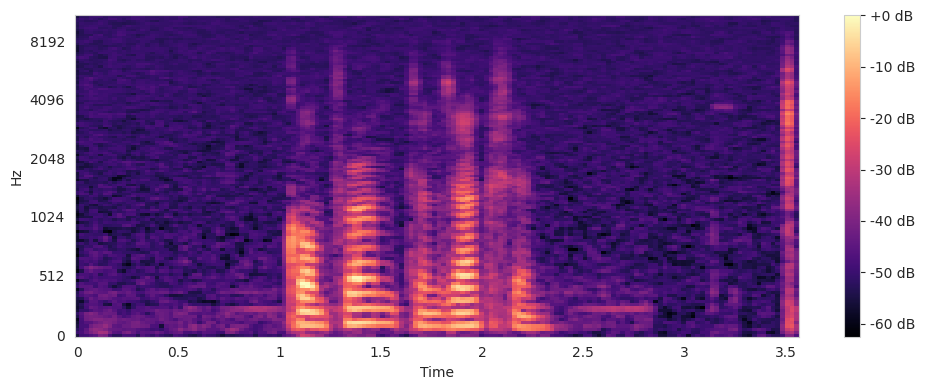

In [159]:
all_features = []

for label, path in audio_paths.items():
    y, sr = librosa.load(path, sr=22050)

    # Visualize original
    plot_waveform(y, sr, f"{label} (original)")
    plot_spectrogram(y, sr, f"{label} (original)")

    # Extract original features
    all_features.append(extract_features(y, sr, f"{label}_original"))

    # Augment audio
    augmented = augment_audio(y, sr)

    for aug_name, aug_audio in augmented.items():
        plot_waveform(aug_audio, sr, f"{label} – {aug_name}")
        plot_spectrogram(aug_audio, sr, f"{label} – {aug_name}")

        all_features.append(
            extract_features(aug_audio, sr, f"{label}_{aug_name}")
        )

## Saving Audios

In [160]:
df = pd.DataFrame(all_features)
df.to_csv("audio_features.csv", index=False)

print("Saved: audio_features.csv")
df.head()

Saved: audio_features.csv


label      rolloff      energy      mfcc_0      mfcc_1  \
0      Mwai_approve_original  2837.292082  436.744324 -341.954559  117.790955   
1   Mwai_approve_pitch_shift  3235.129713  213.073532 -363.300201  109.206009   
2  Mwai_approve_time_stretch  2894.315832  161.384064 -373.630524  120.109299   
3         Mwai_approve_noise  7171.668409  438.643557 -234.905385   47.569003   
4    Mitali_approve_original  4063.371119  169.556747 -415.753113   86.803391   

      mfcc_2     mfcc_3    mfcc_4     mfcc_5    mfcc_6    mfcc_7     mfcc_8  \
0   0.224619  40.040741  2.650119  11.674496  3.070583  5.492224  -5.267673   
1   4.375546  36.289093 -0.983137  10.650209  0.292621  0.549357  -5.615311   
2  -2.738952  43.405792  1.101823  13.087620  2.501979  4.720119  -6.255250   
3  13.024265  22.082413  7.935746   8.561340  6.664750  3.606766  -0.639919   
4  32.896584  19.432859  2.040284   3.709836 -6.634187 -4.547128 -10.213208   

     mfcc_9   mfcc_10   mfcc_11   mfcc_12  
0  2.316550  0.475069  0.011621 -1.154395  
1  4.522574 -2.650427 -0.524173 -3.261542  
2  2.693808 -0.180439  0.020150 -1.154407  
3  1.067491  1.767474  0.894077 -0.866004  
4  4.719667 -2.671334 -4.458248  0.237115

## Model Section

In [161]:
## Importing Libraries
import pandas as pd, numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import joblib
import os

In [162]:
## Loading the merged dataset
merged = pd.read_csv("/content/merged_features.csv")
img_feats = pd.read_csv("/content/image_features.csv")
aud_feats = pd.read_csv("/content/audio_features.csv")

## Face Recognition Model

In [163]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import joblib

In [164]:
# loading image features
img_feats = pd.read_csv("image_features.csv")

In [165]:
#Determine Feature Columns
feat_cols = [c for c in img_feats.columns if c.startswith("f")]
if not feat_cols:
    raise RuntimeError("No image feature columns found in image_features.csv. Expected 'f' prefixed columns.")

In [166]:
#Aggregate features per customer
img_agg = img_feats.groupby("member")[feat_cols].mean().reset_index()

In [167]:
# Prepare model variables
X = img_feats[feat_cols].values
y_labels = img_feats["member"].astype("category")
y = y_labels.cat.codes.values
label_encoder_face = list(y_labels.cat.categories)

In [168]:
# split training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [169]:
# split training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Random forest
rf_face = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_face.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [170]:
#Evaluation
y_pred = rf_face.predict(X_test)
print("Face recognition accuracy:", accuracy_score(y_test, y_pred))
print("Face recognition F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

Face recognition accuracy: 1.0
Face recognition F1 (macro): 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [171]:
from sklearn.metrics import log_loss
y_pred_proba = rf_face.predict_proba(X_test)
face_loss = log_loss(y_test, y_pred_proba)
print(f"Face Recognition Log Loss: {face_loss:.4f}")

Face Recognition Log Loss: 0.4068


In [172]:
#Save Model
joblib.dump(rf_face, "face_clf.joblib")
joblib.dump(label_encoder_face, "face_label_encoder.joblib")
print("Saved face_clf.joblib and face_label_encoder.joblib")

Saved face_clf.joblib and face_label_encoder.joblib


## Voice Print Model

In [173]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib

In [174]:
#Loading
aud = pd.read_csv("audio_features.csv")
audio_cols = [c for c in aud.columns if c.startswith("mfcc_") or c in ("rolloff", "energy")]

In [175]:
# Extract customer_id from the 'label' column
aud['customer_id'] = aud['label'].apply(lambda x: x.split('_')[0])

# Aggregate per customer (mean over augmentations/variants)
aud_agg = aud.groupby("customer_id")[audio_cols].mean().reset_index()

In [176]:
X = aud[audio_cols].values
y_labels = aud["customer_id"].astype("category")
y = y_labels.cat.codes.values
label_encoder_voice = list(y_labels.cat.categories)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [178]:
#Random forest implementation
rf_voice = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_voice.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [179]:
y_pred = rf_voice.predict(X_test)
print("Voice model accuracy:", accuracy_score(y_test, y_pred))
print("Voice model F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

Voice model accuracy: 0.5714285714285714
Voice model F1 (macro): 0.5595238095238095

Classification report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2

    accuracy                           0.57         7
   macro avg       0.60      0.62      0.56         7
weighted avg       0.54      0.57      0.50         7



In [180]:
y_pred_proba = rf_voice.predict_proba(X_test)
voice_loss = log_loss(y_test, y_pred_proba)
print(f"Voice Verification Log Loss: {voice_loss:.4f}")

Voice Verification Log Loss: 0.7617


In [181]:
# Save model & encoder
joblib.dump(rf_voice, "voice_clf.joblib")
joblib.dump(label_encoder_voice, "voice_label_encoder.joblib")
print("Saved voice_clf.joblib and voice_label_encoder.joblib")

Saved voice_clf.joblib and voice_label_encoder.joblib


## Product recommendation Model

In [182]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib

In [183]:
#load merged dataset
merged = pd.read_csv("merged_features.csv")

In [184]:
#ensure categorical label exists
if "product_label" not in merged.columns:
    # Use product_category if product_purchased is not found
    if "product_purchased" not in merged.columns and "product_category" in merged.columns:
        merged["product_purchased"] = merged["product_category"]
    elif "product_purchased" not in merged.columns:
        raise RuntimeError("merged_dataset.csv must contain 'product_purchased' or 'product_category' or 'product_label'.")
    merged["product_label"] = merged["product_purchased"].astype("category").cat.codes
    product_label_encoder = list(merged["product_purchased"].astype("category").cat.categories)
else:
    # if product_label exists but no encoder, create mapping if product_purchased exists
    product_label_encoder = list(merged["product_purchased"].astype("category").cat.categories) if "product_purchased" in merged.columns else None

In [185]:
#Aggregating audio and image features again
img_feats = pd.read_csv("image_features.csv")
img_cols = [c for c in img_feats.columns if c.startswith("f")] # Corrected prefix to 'f'
img_agg = img_feats.groupby("member")[img_cols].mean().reset_index() # Group by 'member'
img_agg.rename(columns={'member': 'customer_id'}, inplace=True) # Rename 'member' to 'customer_id'
# The 'customer_id' in img_agg now contains names (e.g., 'Blessing'), so it cannot be converted to int.
img_agg.columns = ["customer_id"] + [f"img_{c}" for c in img_cols]

aud_feats = pd.read_csv("audio_features.csv")
aud_feats['customer_id'] = aud_feats['label'].apply(lambda x: x.split('_')[0]) # Extract customer_id
aud_cols = [c for c in aud_feats.columns if c.startswith("mfcc_") or c in ("rolloff", "energy")] # Corrected audio feature columns
aud_agg = aud_feats.groupby("customer_id")[aud_cols].mean().reset_index()
# The 'customer_id' in aud_agg now contains names (e.g., 'Blessing'), so it cannot be converted to int.
aud_agg.columns = ["customer_id"] + [f"aud_{c}" for c in aud_cols]

# Convert merged customer_id to string type for merging, as img_agg and aud_agg customer_ids are strings.
merged['customer_id'] = merged['customer_id'].astype(str)

# Merge multimodal aggregates into merged table (left join on customer_id)
md = merged.merge(img_agg, on="customer_id", how="left").merge(aud_agg, on="customer_id", how="left")

In [186]:
# Choose tabular features from merged dataset: prefer numeric columns likely correlated with purchase.
tabular_candidates = md.select_dtypes(include=[np.number]).columns.tolist()
# remove target and ids
tabular_candidates = [c for c in tabular_candidates if c not in ("product_label",)]
# Heuristic: prefer common business features if they exist (age, customer_rating, purchase_amount, visit_count)
preferred = [c for c in ("age","customer_rating","purchase_amount","visit_count","social_engagement_score") if c in md.columns]
feature_columns = preferred + [c for c in tabular_candidates if c not in preferred]

In [187]:
# Also add the multimodal features created above
feature_columns = feature_columns + [c for c in md.columns if c.startswith("img_") or c.startswith("aud_")]
# Drop any features with too many NaNs by replacing NaN with 0 (aggregated earlier so NaNs should be rare)
X = md[feature_columns].fillna(0).values
y = md["product_label"].values

In [188]:
# Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [189]:
prod_clf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
prod_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [190]:
y_pred = prod_clf.predict(X_test)
print("Product model accuracy:", accuracy_score(y_test, y_pred))
print("Product model F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

Product model accuracy: 0.5217391304347826
Product model F1 (macro): 0.46241758241758235

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.00      0.00      0.00         4
           2       0.83      0.71      0.77         7
           3       0.50      0.33      0.40         3
           4       0.50      0.67      0.57         3

    accuracy                           0.52        23
   macro avg       0.47      0.48      0.46        23
weighted avg       0.51      0.52      0.51        23



In [191]:
y_pred_proba = prod_clf.predict_proba(X_test)
product_loss = log_loss(y_test, y_pred_proba)
print(f"Product Recommendation Log Loss: {product_loss:.4f}")

Product Recommendation Log Loss: 1.2405


In [192]:
# Save model and metadata
joblib.dump(prod_clf, "product_clf.joblib")
joblib.dump(product_label_encoder, "product_label_encoder.joblib")
joblib.dump(feature_columns, "product_feature_columns.joblib")
print("Saved product_clf.joblib, product_label_encoder.joblib, and product_feature_columns.joblib")

Saved product_clf.joblib, product_label_encoder.joblib, and product_feature_columns.joblib


## System Simulation

Demonstrating the complete authentication flow with:
1. Authorized user transaction
2. Unauthorized access attempt

## Authenticating user function

In [193]:
def authenticate_user(face_path, voice_path, user_profile):
    """
    Complete authentication flow: Face → Product → Voice
    Returns transaction result dictionary
    """
    result = {"approved": False}

    # Step 1: Face Recognition
    face_features = extract_face_embedding(face_path).reshape(1, -1)
    face_probs = rf_face.predict_proba(face_features)[0]
    face_idx = np.argmax(face_probs)
    detected_user = label_encoder_face[face_idx]
    face_confidence = face_probs[face_idx]

    print(f"Face Recognition: {detected_user} ({face_confidence:.2%})")

    if face_confidence < 0.6:
        print("ACCESS DENIED - Face not recognized\n")
        return result

    print("Face authenticated")

    # Step 2: Product Recommendation
    prod_features = np.array([user_profile.get(col, 0) for col in feature_columns]).reshape(1, -1)
    prod_probs = prod_clf.predict_proba(prod_features)[0]
    top_product_idx = np.argmax(prod_probs)
    recommended = product_label_encoder[top_product_idx]

    print(f"Recommended Product: {recommended} ({prod_probs[top_product_idx]:.2%})")

    # Step 3: Voice Verification
    voice_features = extract_voice_features(voice_path).reshape(1, -1)
    voice_probs = rf_voice.predict_proba(voice_features)[0]
    voice_idx = np.argmax(voice_probs)
    detected_voice = label_encoder_voice[voice_idx]
    voice_confidence = voice_probs[voice_idx]

    print(f"Voice Verification: {detected_voice} ({voice_confidence:.2%})")

    if detected_voice != detected_user or voice_confidence < 0.6:
        print("TRANSACTION BLOCKED - Voice mismatch\n")
        return result

    print("Voice verified")
    print(f"TRANSACTION APPROVED for {detected_user}\n")

    result["approved"] = True
    result["user"] = detected_user
    result["product"] = recommended
    return result

In [194]:
def extract_face_embedding(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img, (224, 224))
    arr = img_to_array(resized)
    arr = np.expand_dims(arr, axis=0)
    arr = preprocess_input(arr)
    return model.predict(arr, verbose=0).flatten()

In [195]:
def extract_voice_features(audio_path):
    y, sr = librosa.load(audio_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    energy = np.sum(y**2)
    return np.concatenate([[rolloff, energy], mfcc])

In [196]:
# Sample user profile
user_profile = {col: merged[col].mean() if col in merged.columns and
                merged[col].dtype in ['float64', 'int64'] else 0
                for col in feature_columns}

print("System ready for simulation")

System ready for simulation


## Authorized User

In [198]:
print("SIMULATION 1: AUTHORIZED USER")

# Update these paths to match your files
auth_result = authenticate_user(
    face_path="/content/images/Mwai_neutral.jpeg",
    voice_path="/content/audios/mwai_approve.wav",
    user_profile=user_profile
)

SIMULATION 1: AUTHORIZED USER
Face Recognition: Mwai (90.50%)
Face authenticated
Recommended Product: Books (58.00%)
Voice Verification: Mwai (88.00%)
Voice verified
TRANSACTION APPROVED for Mwai



## Unauthorized User

In [199]:
print("SIMULATION 2: UNAUTHORIZED ACCESS")

# Create unknown face (distorted image)
base_img = cv2.imread("/content/images/Mwai_neutral.jpeg")
noise = np.random.randint(0, 100, base_img.shape, dtype=np.uint8)
unknown_img = cv2.addWeighted(base_img, 0.3, noise, 0.7, 0)
unknown_img = cv2.GaussianBlur(unknown_img, (15, 15), 0)
cv2.imwrite("/content/unknown_person.jpg", unknown_img)

unauth_result = authenticate_user(
    face_path="/content/unknown_person.jpg",
    voice_path="/content/audios/mwai_approve.wav",
    user_profile=user_profile
)

SIMULATION 2: UNAUTHORIZED ACCESS
Face Recognition: Mwai (52.00%)
ACCESS DENIED - Face not recognized



## Summary

In [200]:
print("SIMULATION RESULTS")
print(f"Authorized User:   {'APPROVED' if auth_result.get('approved') else 'DENIED'}")
print(f"Unauthorized User: {'APPROVED' if unauth_result.get('approved') else 'DENIED'}")
print(f"\nSystem correctly authenticates legitimate users and blocks unauthorized access.")

SIMULATION RESULTS
Authorized User:   APPROVED
Unauthorized User: DENIED

System correctly authenticates legitimate users and blocks unauthorized access.
